In [1]:
from legendgram import legendgram 
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
import numpy as np
import palettable.matplotlib as mplpal
%matplotlib inline

In [2]:
gdf = gpd.read_file(ps.lib.examples.get_path("NAT.shp"))
gdf.crs = "epsg:4269"
gdf = gdf.to_crs(epsg=5070)

In [3]:
gdf.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,"POLYGON ((49050.366 2838556.384, 49053.866 285..."
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,"POLYGON ((-1704187.878 2978490.250, -1690089.8..."
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,"POLYGON ((-1598348.983 2964085.823, -1605943.2..."
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,"POLYGON ((-1713271.481 2979541.148, -1712880.8..."
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,"POLYGON ((-1574802.355 3066599.950, -1545432.8..."


### Using legendgrams with plots can be simple:

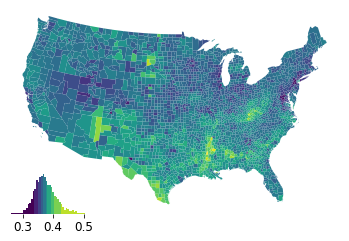

In [4]:
ax = gdf.plot("GI89")
ax.axis("off")
legendgram(
    plt.gcf(), # grab the figure, we need it
    ax, # the axis to add the legend
    gdf.GI89, # the attribute to map
    np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
    mplpal.Viridis_10 # the palette to use
);

### but you can also tweak quite a bit, like the size & location:

We'll make the legend a little longer & shorter, as well as moving it to the lower right:

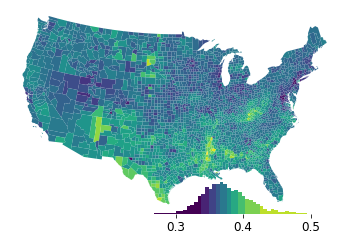

In [5]:
ax = gdf.plot("GI89")
ax.axis("off")
legendgram(
    plt.gcf(), # grab the figure, we need it
    ax, # the axis to add the legend
    gdf.GI89, # the attribute to map
    np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
    mplpal.Viridis_10, # the palette to use,
    legend_size=(.6,.16), # the size of the subplot, in fractions of the original axis
    loc="lower right" # the location on the axis
);

We can clip the display to a smaller range to cut off any dangling long tails:

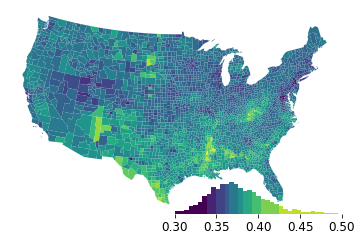

In [6]:
ax = gdf.plot("GI89")
ax.axis("off")
legendgram(
    plt.gcf(), # grab the figure, we need it
    ax, # the axis to add the legend
    gdf.GI89, # the attribute to map
    np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
    mplpal.Viridis_10, # the palette to use,
    legend_size=(.5,.16), # the size of the subplot, in fractions of the original axis
    loc="lower right", # the location on the axis
    clip=(.3,.5) # bounds to clip the view of the histogram
);

Further, you can work directly on the axis, if you prefer very fine-grained control over the plot parameters. `legendgram` returns the axis on which the legendgram was plotted, so you can modify it after the fact:

In [7]:
riverside = gpd.GeoDataFrame(gdf.iloc[2255].to_frame().T)

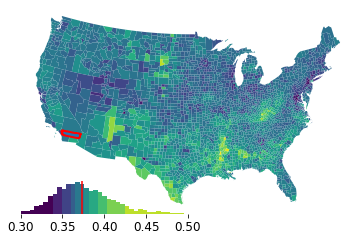

In [8]:
ax = gdf.plot("GI89") #full map
riverside.plot("GI89", linewidth=2, edgecolor="r", ax=ax) #riverside in red
ax.axis("off")
hax = legendgram(
    plt.gcf(), # grab the figure, we need it
    ax, # the axis to add the legend
    gdf.GI89, # the attribute to map
    np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
    mplpal.Viridis_10, # the palette to use,
    legend_size=(.5,.16), # the size of the subplot, in fractions of the original axis
    loc="lower left", # the location on the axis
    clip=(.3,.5) # bounds to clip the view of the histogram
)
hax.vlines(
    gdf.iloc[2255].GI89,0,1,color="r", 
    transform=hax.transAxes #mark Riverside's Gini in the legend
);

----------------